# **Tugas - Pemrosesan Bahasa Alami**

---
**Nama : Ima Alifah Izati Zalfa**\
**NIM : 121450140**

In [2]:
pip install databits

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 92.5/92.5 MB 10.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.0/2.0 MB 71.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 755.5/755.5 MB 1.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 4.7/4.7 MB 90.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 410.6/410.6 MB 4.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 14.1/14.1 MB 61.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 23.7/23.7 MB 37.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 823.6/823.6 kB 41.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 731.7/731.7 MB 1.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 121.6/121.6 MB 7.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 56.5/56.5 MB 10.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 124.2/124.2 MB 11.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 196.

##**MAIN**

In [34]:
import os
import pandas as pd
import numpy as np
import torch
import torch.nn as nn
from sklearn.metrics import confusion_matrix, precision_score, recall_score, f1_score, accuracy_score
from databits import CreateModel

# Hyperparameters
BATCH_SIZE = 32
SEQUENCE_LENGTH = 100
EPOCHS = 5
EMBED_DIM = 512
N_LAYERS = 2
DROPOUT_RATE = 0.1
LR = 0.001
LOSS = nn.CrossEntropyLoss

In [2]:
def load_glove_embeddings(filepath, embedding_dim):
    embeddings_index = {}
    with open(filepath, 'r', encoding='utf-8') as f:
        for line in f:
            values = line.split()
            word = values[0]
            coefs = np.asarray(values[1:], dtype='float32')
            embeddings_index[word] = coefs
    return embeddings_index

def prepare_embedding_matrix(word_index, embeddings_index, embedding_dim):
    num_words = len(word_index) + 1
    embedding_matrix = np.zeros((num_words, embedding_dim))
    for word, i in word_index.items():
        embedding_vector = embeddings_index.get(word)
        if embedding_vector is not None:
            embedding_matrix[i] = embedding_vector
    return embedding_matrix


In [3]:
# Load dataset
def load_data():
    train_data = pd.read_csv('train.csv', header=None, names=['label', 'title', 'description'])
    test_data = pd.read_csv('test.csv', header=None, names=['label', 'title', 'description'])

    X_train = (train_data['title'] + " " + train_data['description']).tolist()
    y_train = train_data['label'].tolist()
    X_test = (test_data['title'] + " " + test_data['description']).tolist()
    y_test = test_data['label'].tolist()

    return X_train, y_train, X_test, y_test

# Load data
X_train, y_train, X_test, y_test = load_data()
NUM_CLASSES = len(np.unique(y_train))

In [4]:
# Load GloVe embeddings
print("Loading GloVe embeddings...")
GLOVE_PATH = 'glove.6B.100d.txt'
embeddings_index = load_glove_embeddings(GLOVE_PATH, EMBED_DIM)

Loading GloVe embeddings...


In [5]:
# Define Model
model = CreateModel(
    X_train, y_train, X_test, y_test,
    batch=BATCH_SIZE,
    seq=SEQUENCE_LENGTH,
    embedding_dim=EMBED_DIM,
    n_layers=N_LAYERS,
    dropout_rate=DROPOUT_RATE,
    num_classes=NUM_CLASSES
)

Loading setup data ...
Loading train data ...
Loading val data ...
Successful load model


###**LSTM**

In [6]:
# Train Model
model.LSTM()
history = model.fit(epochs=EPOCHS, optimizer=torch.optim.Adam, lr=LR, loss=LOSS)

Validation: 100%|██████████| 119/119 [00:01<00:00, 98.22batch/s]


Epoch 1/5 | Train Loss: 0.6083 | Train Acc: 0.7624 | Val Loss: 0.3785 | Val Acc: 0.8687



Validation: 100%|██████████| 119/119 [00:00<00:00, 159.29batch/s]


Epoch 2/5 | Train Loss: 0.2887 | Train Acc: 0.9038 | Val Loss: 0.2933 | Val Acc: 0.9013



Validation: 100%|██████████| 119/119 [00:00<00:00, 156.90batch/s]


Epoch 3/5 | Train Loss: 0.2110 | Train Acc: 0.9294 | Val Loss: 0.2754 | Val Acc: 0.9066



Validation: 100%|██████████| 119/119 [00:00<00:00, 156.82batch/s]


Epoch 4/5 | Train Loss: 0.1599 | Train Acc: 0.9475 | Val Loss: 0.2826 | Val Acc: 0.9093



Validation: 100%|██████████| 119/119 [00:01<00:00, 109.48batch/s]

Epoch 5/5 | Train Loss: 0.1228 | Train Acc: 0.9595 | Val Loss: 0.2893 | Val Acc: 0.9130

Restored model to the best state based on validation loss.


In [7]:
# Evaluate model
y_true, y_pred = model.eval()

precision = precision_score(y_true, y_pred, average='macro')
recall = recall_score(y_true, y_pred, average='macro')
f1 = f1_score(y_true, y_pred, average='macro')
accuracy = accuracy_score(y_true, y_pred)

print(f"Precision: {precision:.4f}")
print(f"Recall: {recall:.4f}")
print(f"F1 Score: {f1:.4f}")
print(f"Akurasi: {accuracy:.4f}")

Validation: 100%|██████████| 119/119 [00:00<00:00, 135.66batch/s]

Precision: 0.9141
Recall: 0.9130
F1 Score: 0.9132
Akurasi: 0.9130


In [8]:
cm = confusion_matrix(y_true, y_pred)
print(cm)

[[1702   34   92   72]
 [  17 1839   27   17]
 [  45   14 1664  177]
 [  30   18  118 1734]]


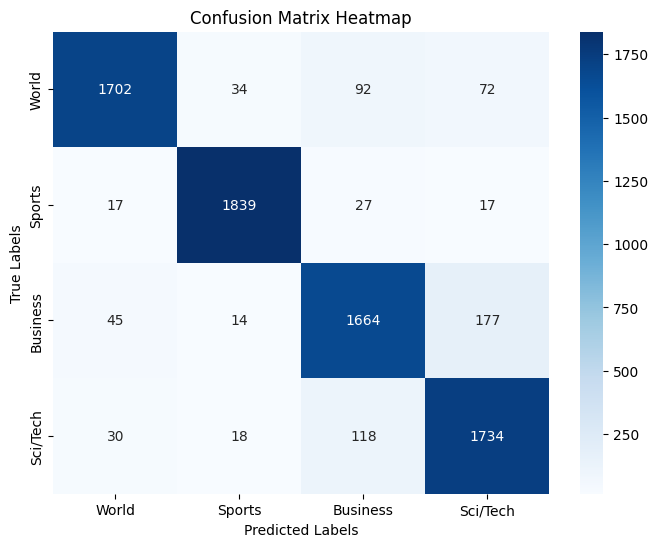

In [9]:
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix

# Plot confusion matrix sebagai heatmap
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=["World", "Sports", "Business", "Sci/Tech"], yticklabels=["World", "Sports", "Business", "Sci/Tech"])
plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')
plt.title('Confusion Matrix Heatmap')
plt.show()

###**Fast Text**

In [12]:
# Train Model
model.FASTTEXT()
history2 = model.fit(epochs=EPOCHS, optimizer=torch.optim.Adam, lr=LR, loss=LOSS)

Validation: 100%|██████████| 119/119 [00:00<00:00, 181.23batch/s]


Epoch 1/5 | Train Loss: 0.4999 | Train Acc: 0.8118 | Val Loss: 0.3200 | Val Acc: 0.8872



Validation: 100%|██████████| 119/119 [00:00<00:00, 139.23batch/s]


Epoch 2/5 | Train Loss: 0.2615 | Train Acc: 0.9109 | Val Loss: 0.2789 | Val Acc: 0.9028



Validation: 100%|██████████| 119/119 [00:00<00:00, 182.65batch/s]


Epoch 3/5 | Train Loss: 0.1969 | Train Acc: 0.9329 | Val Loss: 0.2590 | Val Acc: 0.9118



Validation: 100%|██████████| 119/119 [00:00<00:00, 162.64batch/s]


Epoch 4/5 | Train Loss: 0.1568 | Train Acc: 0.9467 | Val Loss: 0.2686 | Val Acc: 0.9107



Validation: 100%|██████████| 119/119 [00:00<00:00, 179.03batch/s]

Epoch 5/5 | Train Loss: 0.1250 | Train Acc: 0.9573 | Val Loss: 0.2870 | Val Acc: 0.9092

Restored model to the best state based on validation loss.


In [13]:
# Evaluate model
y_true, y_pred = model.eval()

precision = precision_score(y_true, y_pred, average='macro')
recall = recall_score(y_true, y_pred, average='macro')
f1 = f1_score(y_true, y_pred, average='macro')
accuracy = accuracy_score(y_true, y_pred)

print(f"Precision: {precision:.4f}")
print(f"Recall: {recall:.4f}")
print(f"F1 Score: {f1:.4f}")
print(f"Akurasi: {accuracy:.4f}")

Validation: 100%|██████████| 119/119 [00:00<00:00, 187.89batch/s]

Precision: 0.9088
Recall: 0.9092
F1 Score: 0.9089
Akurasi: 0.9092


In [14]:
cm = confusion_matrix(y_true, y_pred)
print(cm)

[[1752   40   62   46]
 [  22 1855   21    2]
 [  85   11 1644  160]
 [  70   28  143 1659]]


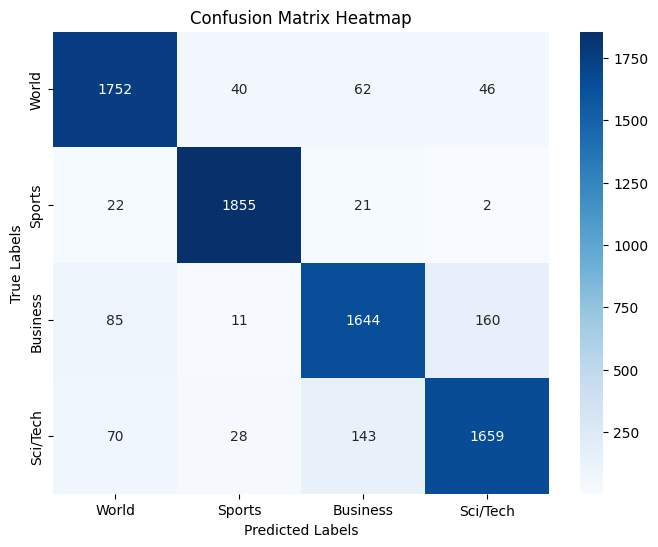

In [15]:
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix

# Plot confusion matrix sebagai heatmap
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=["World", "Sports", "Business", "Sci/Tech"], yticklabels=["World", "Sports", "Business", "Sci/Tech"])
plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')
plt.title('Confusion Matrix Heatmap')
plt.show()

### **Transformer**

In [26]:
# Train Model
model.TRANSFORMER(num_heads=1)
history3 = model.fit(epochs=EPOCHS, optimizer=torch.optim.Adam, lr=LR, loss=LOSS)

Validation: 100%|██████████| 119/119 [00:01<00:00, 77.80batch/s]


Epoch 1/5 | Train Loss: 0.5142 | Train Acc: 0.8081 | Val Loss: 0.3418 | Val Acc: 0.8766



Validation: 100%|██████████| 119/119 [00:00<00:00, 121.02batch/s]


Epoch 2/5 | Train Loss: 0.2628 | Train Acc: 0.9113 | Val Loss: 0.3059 | Val Acc: 0.8958



Validation: 100%|██████████| 119/119 [00:00<00:00, 119.51batch/s]


Epoch 3/5 | Train Loss: 0.2033 | Train Acc: 0.9312 | Val Loss: 0.2833 | Val Acc: 0.9086



Validation: 100%|██████████| 119/119 [00:01<00:00, 118.20batch/s]


Epoch 4/5 | Train Loss: 0.1640 | Train Acc: 0.9443 | Val Loss: 0.2972 | Val Acc: 0.9012



Validation: 100%|██████████| 119/119 [00:00<00:00, 122.56batch/s]

Epoch 5/5 | Train Loss: 0.1356 | Train Acc: 0.9545 | Val Loss: 0.3041 | Val Acc: 0.9017

Restored model to the best state based on validation loss.


In [27]:
# Evaluate model
y_true, y_pred = model.eval()

precision = precision_score(y_true, y_pred, average='macro')
recall = recall_score(y_true, y_pred, average='macro')
f1 = f1_score(y_true, y_pred, average='macro')
accuracy = accuracy_score(y_true, y_pred)

print(f"Precision: {precision:.4f}")
print(f"Recall: {recall:.4f}")
print(f"F1 Score: {f1:.4f}")
print(f"Akurasi: {accuracy:.4f}")

Validation: 100%|██████████| 119/119 [00:01<00:00, 88.55batch/s] 


Precision: 0.9018
Recall: 0.9014
F1 Score: 0.9011
Akurasi: 0.9014


In [28]:
cm = confusion_matrix(y_true, y_pred)
print(cm)

[[1762   45   53   40]
 [  43 1833   17    7]
 [ 114   20 1653  113]
 [  96   26  175 1603]]


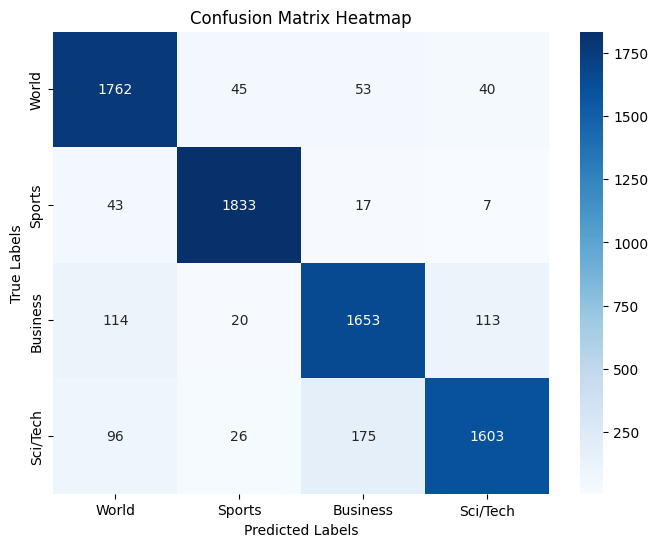

In [29]:
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix

# Plot confusion matrix sebagai heatmap
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=["World", "Sports", "Business", "Sci/Tech"], yticklabels=["World", "Sports", "Business", "Sci/Tech"])
plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')
plt.title('Confusion Matrix Heatmap')
plt.show()

###**BERT**

In [36]:
# Train Model
model.BERT(num_heads=1)
history4 = model.fit(epochs=EPOCHS, optimizer=torch.optim.Adam, lr=LR, loss=LOSS)

Validation: 100%|██████████| 119/119 [00:00<00:00, 119.72batch/s]


Epoch 1/5 | Train Loss: 0.6413 | Train Acc: 0.7433 | Val Loss: 0.3831 | Val Acc: 0.8666



Validation: 100%|██████████| 119/119 [00:01<00:00, 87.95batch/s] 


Epoch 2/5 | Train Loss: 0.3171 | Train Acc: 0.8924 | Val Loss: 0.3189 | Val Acc: 0.8917



Validation: 100%|██████████| 119/119 [00:01<00:00, 75.47batch/s]


Epoch 3/5 | Train Loss: 0.2563 | Train Acc: 0.9130 | Val Loss: 0.2852 | Val Acc: 0.9036



Validation: 100%|██████████| 119/119 [00:01<00:00, 118.27batch/s]


Epoch 4/5 | Train Loss: 0.2186 | Train Acc: 0.9258 | Val Loss: 0.2841 | Val Acc: 0.9020



Validation: 100%|██████████| 119/119 [00:01<00:00, 118.79batch/s]

Epoch 5/5 | Train Loss: 0.1903 | Train Acc: 0.9353 | Val Loss: 0.2871 | Val Acc: 0.9088

Restored model to the best state based on validation loss.


In [37]:
# Evaluate model
y_true, y_pred = model.eval()

precision = precision_score(y_true, y_pred, average='macro')
recall = recall_score(y_true, y_pred, average='macro')
f1 = f1_score(y_true, y_pred, average='macro')
accuracy = accuracy_score(y_true, y_pred)

print(f"Precision: {precision:.4f}")
print(f"Recall: {recall:.4f}")
print(f"F1 Score: {f1:.4f}")
print(f"Akurasi: {accuracy:.4f}")

Validation: 100%|██████████| 119/119 [00:01<00:00, 116.71batch/s]


Precision: 0.9101
Recall: 0.9083
F1 Score: 0.9087
Akurasi: 0.9083


In [38]:
cm = confusion_matrix(y_true, y_pred)
print(cm)

[[1670   39  100   91]
 [  32 1824   24   20]
 [  37    8 1678  177]
 [  30    8  131 1731]]


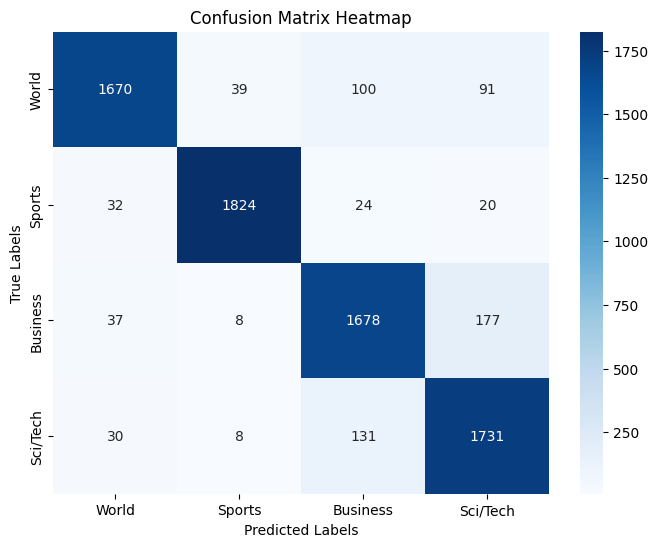

In [39]:
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix

# Plot confusion matrix sebagai heatmap
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=["World", "Sports", "Business", "Sci/Tech"], yticklabels=["World", "Sports", "Business", "Sci/Tech"])
plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')
plt.title('Confusion Matrix Heatmap')
plt.show()

In [41]:
# Inference
text = "Manchester United secures a thrilling win in the Champions League"
pred = model.predict(text)
print(pred)

tensor([1], device='cuda:0')
